In [1]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

DATASET = "train"
DATASET2 = "valid"

CATEGORIES = ["Tomato___Bacterial_spot", "Tomato___Early_blight", "Tomato___healthy", "Tomato___Late_blight",
              "Tomato___Leaf_Mold", "Tomato___Septoria_leaf_spot", "Tomato___Spider_mites Two-spotted_spider_mite",
              "Tomato___Target_Spot", "Tomato___Tomato_mosaic_virus", "Tomato___Tomato_Yellow_Leaf_Curl_Virus"]


In [4]:
train_data = []

for category in CATEGORIES:
    label = CATEGORIES.index(category)
    path = os.path.join(DATASET, category)
    for img_file in os.listdir(path):
        img = cv.imread(os.path.join(path, img_file), 1)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        img = cv.resize(img, (64, 64))
        train_data.append([img, label])

test_data = []

for category in CATEGORIES:
    label = CATEGORIES.index(category)
    path = os.path.join(DATASET2, category)
    for img_file in os.listdir(path):
        img = cv.imread(os.path.join(path, img_file), 1)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        img = cv.resize(img, (64, 64))
        test_data.append([img, label])

print(len(train_data))
print(len(test_data))


18345
4585


In [5]:
import random

random.shuffle(train_data)
random.shuffle(test_data)

for lbl in train_data[:10]:
    print(lbl[1])

X_train = []
y_train = []

for features, label in train_data:
    X_train.append(features)
    y_train.append(label)

Y = []
for i in y_train:
    if i == 0:
        Y.append("BACTERIAL SPOT")
    elif i == 1:
        Y.append("EARLY BLIGHT")
    elif i == 2:
        Y.append("HEALTHY")
    elif i == 3:
        Y.append("LATE BLIGHT")
    elif i == 4:
        Y.append("LEAF MOLD")
    elif i == 5:
        Y.append("SEPTORIA LEAF SPOT")
    elif i == 6:
        Y.append("SPIDER MITE")
    elif i == 7:
        Y.append("TARGET SPOT")
    elif i == 8:
        Y.append("MOSAIC VIRUS")
    else:
        Y.append("YELLOW LEAF CURL VIRUS")

len(X_train), len(y_train)


0
1
9
1
1
8
5
2
4
5


(18345, 18345)

In [6]:
X_test = []
y_test = []

for features, label in test_data:
    X_test.append(features)
    y_test.append(label)

Z = []
for i in y_test:
    if i == 0:
        Z.append("BACTERIAL SPOT")
    elif i == 1:
        Z.append("EARLY BLIGHT")
    elif i == 2:
        Z.append("HEALTHY")
    elif i == 3:
        Z.append("LATE BLIGHT")
    elif i == 4:
        Z.append("LEAF MOLD")
    elif i == 5:
        Z.append("SEPTORIA LEAF SPOT")
    elif i == 6:
        Z.append("SPIDER MITE")
    elif i == 7:
        Z.append("TARGET SPOT")
    elif i == 8:
        Z.append("MOSAIC VIRUS")
    else:
        Z.append("YELLOW LEAF CURL VIRUS")

len(X_test), len(y_test)

X_train = np.array(X_train).reshape(-1, 64, 64, 3)
X_train = X_train / 255.0
X_train.shape

X_test = np.array(X_test).reshape(-1, 64, 64, 3)
X_test = X_test / 255.0
X_test.shape


(4585, 64, 64, 3)

C:\Users\Sid55\AppData\Local\Temp\ipykernel_33620\4043608496.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
C:\Users\Sid55\AppData\Local\Temp\ipykernel_33620\4043608496.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


Text(0, 0.5, 'Image Count')

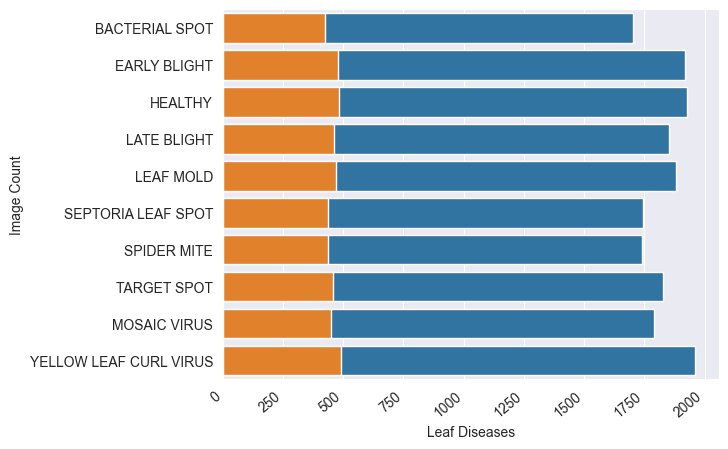

In [7]:
order = ['BACTERIAL SPOT', 'EARLY BLIGHT', 'HEALTHY', 'LATE BLIGHT', 'LEAF MOLD', 'SEPTORIA LEAF SPOT', 'SPIDER MITE',
         'TARGET SPOT', 'MOSAIC VIRUS', 'YELLOW LEAF CURL VIRUS']

ax = sns.countplot(Y, order=order)
ax.set_xlabel("Leaf Diseases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylabel("Image Count")

ax = sns.countplot(Z, order=order)
ax.set_xlabel("Leaf Diseases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylabel("Image Count")


In [8]:
from keras.utils import to_categorical

one_hot_train = to_categorical(y_train)

one_hot_test = to_categorical(y_test)
one_hot_test


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.4))

classifier.add(Flatten())

classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='relu', units=128))
classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='softmax', units=10))

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

classifier.summary()

hist = classifier.fit(X_train, one_hot_train, epochs=75, batch_size=128, validation_split=0.2)

test_loss, test_acc = classifier.evaluate(X_test, one_hot_test)
test_loss, test_acc

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0

(0.1390220820903778, 0.9522355794906616)

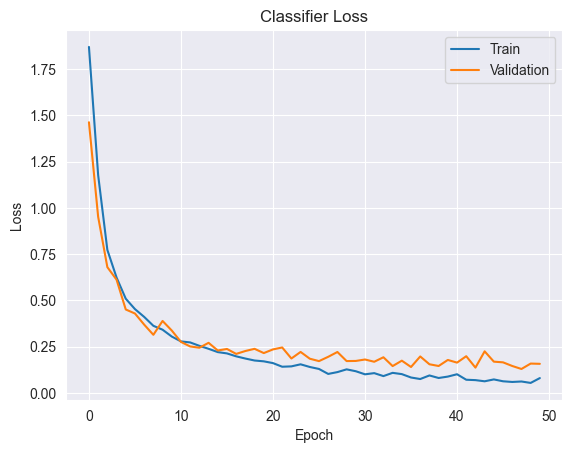

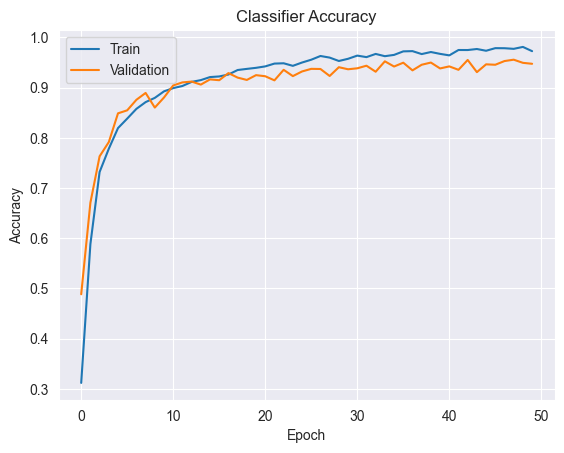

144/144 [==============================] - 2s 14ms/step


array([1, 7, 4, ..., 0, 4, 0], dtype=int64)

In [10]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Classifier Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Classifier Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

y_prob = classifier.predict(X_test)
y_pred = np.argmax(y_prob,axis=1)
y_pred

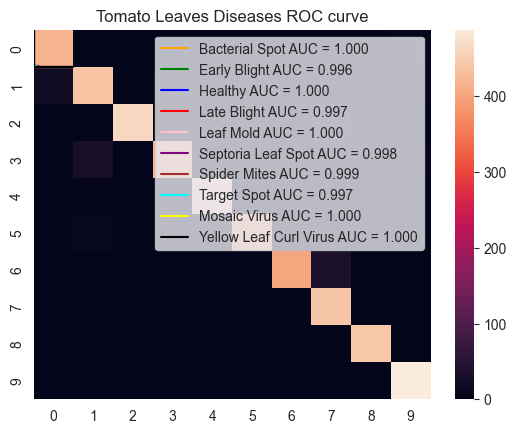

In [11]:
from sklearn.metrics import roc_curve, auc

fpr = {}
tpr = {}
thresh = {}
roc_auc = {}

n_class = 10

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.plot(fpr[0], tpr[0], color='orange', label='Bacterial Spot AUC = %0.3f' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='green', label='Early Blight AUC = %0.3f' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='blue', label='Healthy AUC = %0.3f' % roc_auc[2])
plt.plot(fpr[3], tpr[3], color='red', label='Late Blight AUC = %0.3f' % roc_auc[3])
plt.plot(fpr[4], tpr[4], color='pink', label='Leaf Mold AUC = %0.3f' % roc_auc[4])
plt.plot(fpr[5], tpr[5], color='purple', label='Septoria Leaf Spot AUC = %0.3f' % roc_auc[5])
plt.plot(fpr[6], tpr[6], color='brown', label='Spider Mites AUC = %0.3f' % roc_auc[6])
plt.plot(fpr[7], tpr[7], color='cyan', label='Target Spot AUC = %0.3f' % roc_auc[7])
plt.plot(fpr[8], tpr[8], color='yellow', label='Mosaic Virus AUC = %0.3f' % roc_auc[8])
plt.plot(fpr[9], tpr[9], color='black', label='Yellow Leaf Curl Virus AUC = %0.3f' % roc_auc[9])
plt.title('Tomato Leaves Diseases ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

In [12]:
cm

array([[416,   1,   0,   0,   0,   0,   0,   1,   0,   7],
       [ 18, 437,   0,  11,   0,   4,   2,   4,   0,   4],
       [  0,   0, 462,   2,   0,   0,   0,  17,   0,   0],
       [  2,  30,   1, 417,   3,   3,   2,   1,   0,   4],
       [  0,   7,   0,   1, 455,   4,   1,   0,   0,   2],
       [  0,   9,   0,   2,  10, 409,   0,   4,   1,   1],
       [  0,   0,   0,   0,   0,   0, 401,  33,   0,   1],
       [  1,   3,   2,   3,   0,   2,   5, 439,   1,   1],
       [  0,   3,   0,   0,   1,   0,   1,   0, 442,   1],
       [  0,   0,   0,   0,   0,   0,   2,   0,   0, 488]], dtype=int64)

In [13]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.98      0.97       425\n           1       0.89      0.91      0.90       480\n           2       0.99      0.96      0.98       481\n           3       0.96      0.90      0.93       463\n           4       0.97      0.97      0.97       470\n           5       0.97      0.94      0.95       436\n           6       0.97      0.92      0.94       435\n           7       0.88      0.96      0.92       457\n           8       1.00      0.99      0.99       448\n           9       0.96      1.00      0.98       490\n\n    accuracy                           0.95      4585\n   macro avg       0.95      0.95      0.95      4585\nweighted avg       0.95      0.95      0.95      4585\n'